## Predictive Analytics in Human Resources
### By Praneel Rastogi - 53, Aditya Mohan - 42, Mayank Motwani - 43

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
#Importing Dataset
training_data = pd.read_csv(r"train.csv")

In [2]:
import seaborn as sns

In [3]:
#Exploring the Data
training_data.head()

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,Travel_Rarely,1376.0,Human Resources,1,Male,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,Non-Travel,675.0,Research & Development,5,Male,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,Travel_Rarely,210.0,Sales,29,Male,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,Travel_Rarely,1180.0,Research & Development,25,Male,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,Travel_Rarely,391.0,Research & Development,7,Male,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1


In [4]:
#Assigning numbers to word input in Business travel column for betterment analysis.
training_data['BusinessTravel'].unique()
training_data = training_data.replace(to_replace='Travel_Rarely', value=1)
training_data = training_data.replace(to_replace='Travel_Frequently', value=2)
training_data = training_data.replace(to_replace='Non-Travel', value=0)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,Human Resources,1,Male,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,Research & Development,5,Male,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,Sales,29,Male,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,Research & Development,25,Male,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,Research & Development,7,Male,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,Research & Development,7,Female,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,Research & Development,28,Female,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,Sales,13,Male,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,Research & Development,4,Male,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [5]:
#Cells for Debugging

In [6]:
#Assigning numbers to word input in department column for betterment analysis.
training_data['Department'].unique()
training_data = training_data.replace(to_replace='Human Resources', value=0)
training_data = training_data.replace(to_replace='Research & Development', value=1)
training_data = training_data.replace(to_replace='Sales', value=2)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,Male,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,Male,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,Male,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,Male,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,Male,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,Female,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,Female,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,Male,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,Male,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [7]:
#Cells for Debugging

In [8]:
#Assigning numbers to word input in Gender column for betterment analysis.
training_data['Gender'].unique()
training_data = training_data.replace(to_replace='Male', value=0)
training_data = training_data.replace(to_replace='Female', value=1)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [9]:
#Cells for Debugging

In [10]:
#Assigning numbers to word input in JobRole column for betterment analysis.
training_data['JobRole'].unique()
training_data = training_data.replace(to_replace='Healthcare Representative', value=0)
training_data = training_data.replace(to_replace='Manager', value=1)
training_data = training_data.replace(to_replace='Research Scientist', value=2)
training_data = training_data.replace(to_replace='Laboratory Technician', value=3)
training_data = training_data.replace(to_replace='Manufacturing Director', value=4) 
training_data = training_data.replace(to_replace='Sales Executive', value=5)
training_data = training_data.replace(to_replace='Research Director', value=6)
training_data = training_data.replace(to_replace='Sales Representative', value=7)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [11]:
#Cells for Debugging

In [12]:
#Assigning numbers to word input in Marital Status column for betterment analysis.
training_data['MaritalStatus'].unique()
training_data = training_data.replace(to_replace='Married', value=0)
training_data = training_data.replace(to_replace='Divorced', value=1)
training_data = training_data.replace(to_replace='Single', value=2)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [13]:
#Cells for Debugging

In [14]:
#Assigning numbers to word input in Over 18 column for betterment analysis.
training_data['Over18'].unique()
training_data = training_data.replace(to_replace='Y', value=1)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [15]:
#Cells for Debugging

In [16]:
#Assigning numbers to word input in Overtime column for betterment analysis.
training_data['OverTime'].unique()
training_data = training_data.replace(to_replace='No', value=0)
training_data = training_data.replace(to_replace='Yes', value=1)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [17]:
#Cells for Debugging

In [18]:
#Assigning numbers to word input in education field column for betterment analysis.
training_data['EducationField'].unique()
training_data = training_data.replace(to_replace='Medical', value=0)
training_data = training_data.replace(to_replace='Life Sciences', value=1)
training_data = training_data.replace(to_replace='Marketing', value=2)
training_data = training_data.replace(to_replace='Technical Degree', value=3)
training_data = training_data.replace(to_replace='Other', value=4)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1098,2.0,3.0,6,3.0,6,0,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,369,2.0,3.0,3,1.0,5,0,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,568,1.0,2.0,0,0.0,0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,1993,1.0,3.0,14,12.0,11,0,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1878,4.0,3.0,0,0.0,0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,1299,2.0,3.0,7,7.0,7,0,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,2034,1.0,3.0,7,0.0,10,0,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,1733,2.0,3.0,2,2.0,2,0,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,705,1.0,4.0,2,0.0,2,0,15.0,0,3


In [19]:
#Cells for Debugging

In [20]:
training_data.describe()

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Attrition,YearsAtCompany
count,1230.000000,1229.000000,1230.000000,1229.000000,1230.000000,1230.000000,1230.000000,1228.000000,1229.000000,1230.000000,...,1230.000000,1229.000000,1229.000000,1230.000000,1229.000000,1230.000000,1230.0,1229.000000,1230.000000,1230.000000
mean,615.500000,36.795769,1.086179,793.542718,1.263415,9.232520,0.398374,66.026873,2.733930,2.069919,...,1193.284553,2.723352,2.766477,4.171545,2.171684,4.078862,0.0,12.837266,0.160163,6.958537
std,355.214724,9.020955,0.532786,403.156993,0.534150,8.101146,0.489762,20.254858,0.716258,1.101810,...,507.467256,1.103717,0.703631,3.541777,3.192108,3.537472,0.0,8.549028,0.366906,6.003314
min,1.000000,18.000000,0.000000,102.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,332.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
25%,308.250000,30.000000,1.000000,458.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,752.500000,2.000000,2.000000,2.000000,0.000000,2.000000,0.0,6.000000,0.000000,3.000000
50%,615.500000,36.000000,1.000000,786.000000,1.000000,7.000000,0.000000,66.000000,3.000000,2.000000,...,1195.500000,3.000000,3.000000,3.000000,1.000000,3.000000,0.0,11.000000,0.000000,5.000000
75%,922.750000,43.000000,1.000000,1146.000000,2.000000,14.000000,1.000000,84.000000,3.000000,3.000000,...,1638.750000,4.000000,3.000000,7.000000,3.000000,7.000000,0.0,17.000000,0.000000,9.000000
max,1230.000000,60.000000,2.000000,1499.000000,2.000000,29.000000,1.000000,100.000000,4.000000,5.000000,...,2068.000000,4.000000,4.000000,17.000000,15.000000,17.000000,0.0,49.000000,1.000000,36.000000


In [21]:
#Checking for Null values
training_data.isnull().sum()

ID                          0
Age                         1
BusinessTravel              0
DailyRate                   1
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  2
JobInvolvement              1
JobLevel                    0
JobRole                     0
JobSatisfaction             1
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 1
NumCompaniesWorked          1
Over18                      0
OverTime                    0
PercentSalaryHike           1
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               1
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    1
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           1
TrainingTimesLastYear       0
Education                   1
EducationField              0
EmployeeCo

In [22]:
#Cells for Debugging

In [23]:
#Removing the Null Values
training_data['Age'] = training_data['Age'].fillna(training_data['Age'].mean())
training_data['DailyRate'] = training_data['DailyRate'].fillna(training_data['DailyRate'].mean())
training_data['HourlyRate'] = training_data['HourlyRate'].fillna(training_data['HourlyRate'].mean())
training_data['JobInvolvement'] = training_data['JobInvolvement'].fillna(training_data['JobInvolvement'].mean())
training_data['JobSatisfaction'] = training_data['JobSatisfaction'].fillna(training_data['JobSatisfaction'].mean())
training_data['MonthlyRate'] = training_data['MonthlyRate'].fillna(training_data['MonthlyRate'].mean())
training_data['LvlGrownInOrg'] = training_data['LvlGrownInOrg'].fillna(training_data['LvlGrownInOrg'].mean())
training_data['RelationshipSatisfaction'] = training_data['RelationshipSatisfaction'].fillna(training_data['RelationshipSatisfaction'].mean())
training_data['TotalWorkingYears'] = training_data['TotalWorkingYears'].fillna(training_data['TotalWorkingYears'].mean())
training_data['Education'] = training_data['Education'].fillna(training_data['Education'].mean())
training_data['EnvironmentSatisfaction'] = training_data['EnvironmentSatisfaction'].fillna(training_data['EnvironmentSatisfaction'].mean())
training_data['WorkLifeBalance'] = training_data['WorkLifeBalance'].fillna(training_data['WorkLifeBalance'].mean())
training_data['ProjectsContributed'] = training_data['ProjectsContributed'].fillna(training_data['ProjectsContributed'].mean())
training_data['NumCompaniesWorked'] = training_data['NumCompaniesWorked'].fillna(training_data['NumCompaniesWorked'].mean())
training_data['YearsSinceLastPromotion'] = training_data['YearsSinceLastPromotion'].fillna(training_data['YearsSinceLastPromotion'].mean())
training_data['PercentSalaryHike'] = training_data['PercentSalaryHike'].fillna(training_data['PercentSalaryHike'].mean())
training_data.isnull().sum()

ID                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
CommunicationSkill          0
Behaviour                   0
Experience                  0
LvlGrownInOrg               0
ContributionIndex           0
TechnicalExpertise          0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Education                   0
EducationField              0
EmployeeCo

In [24]:
#Cells for Debugging

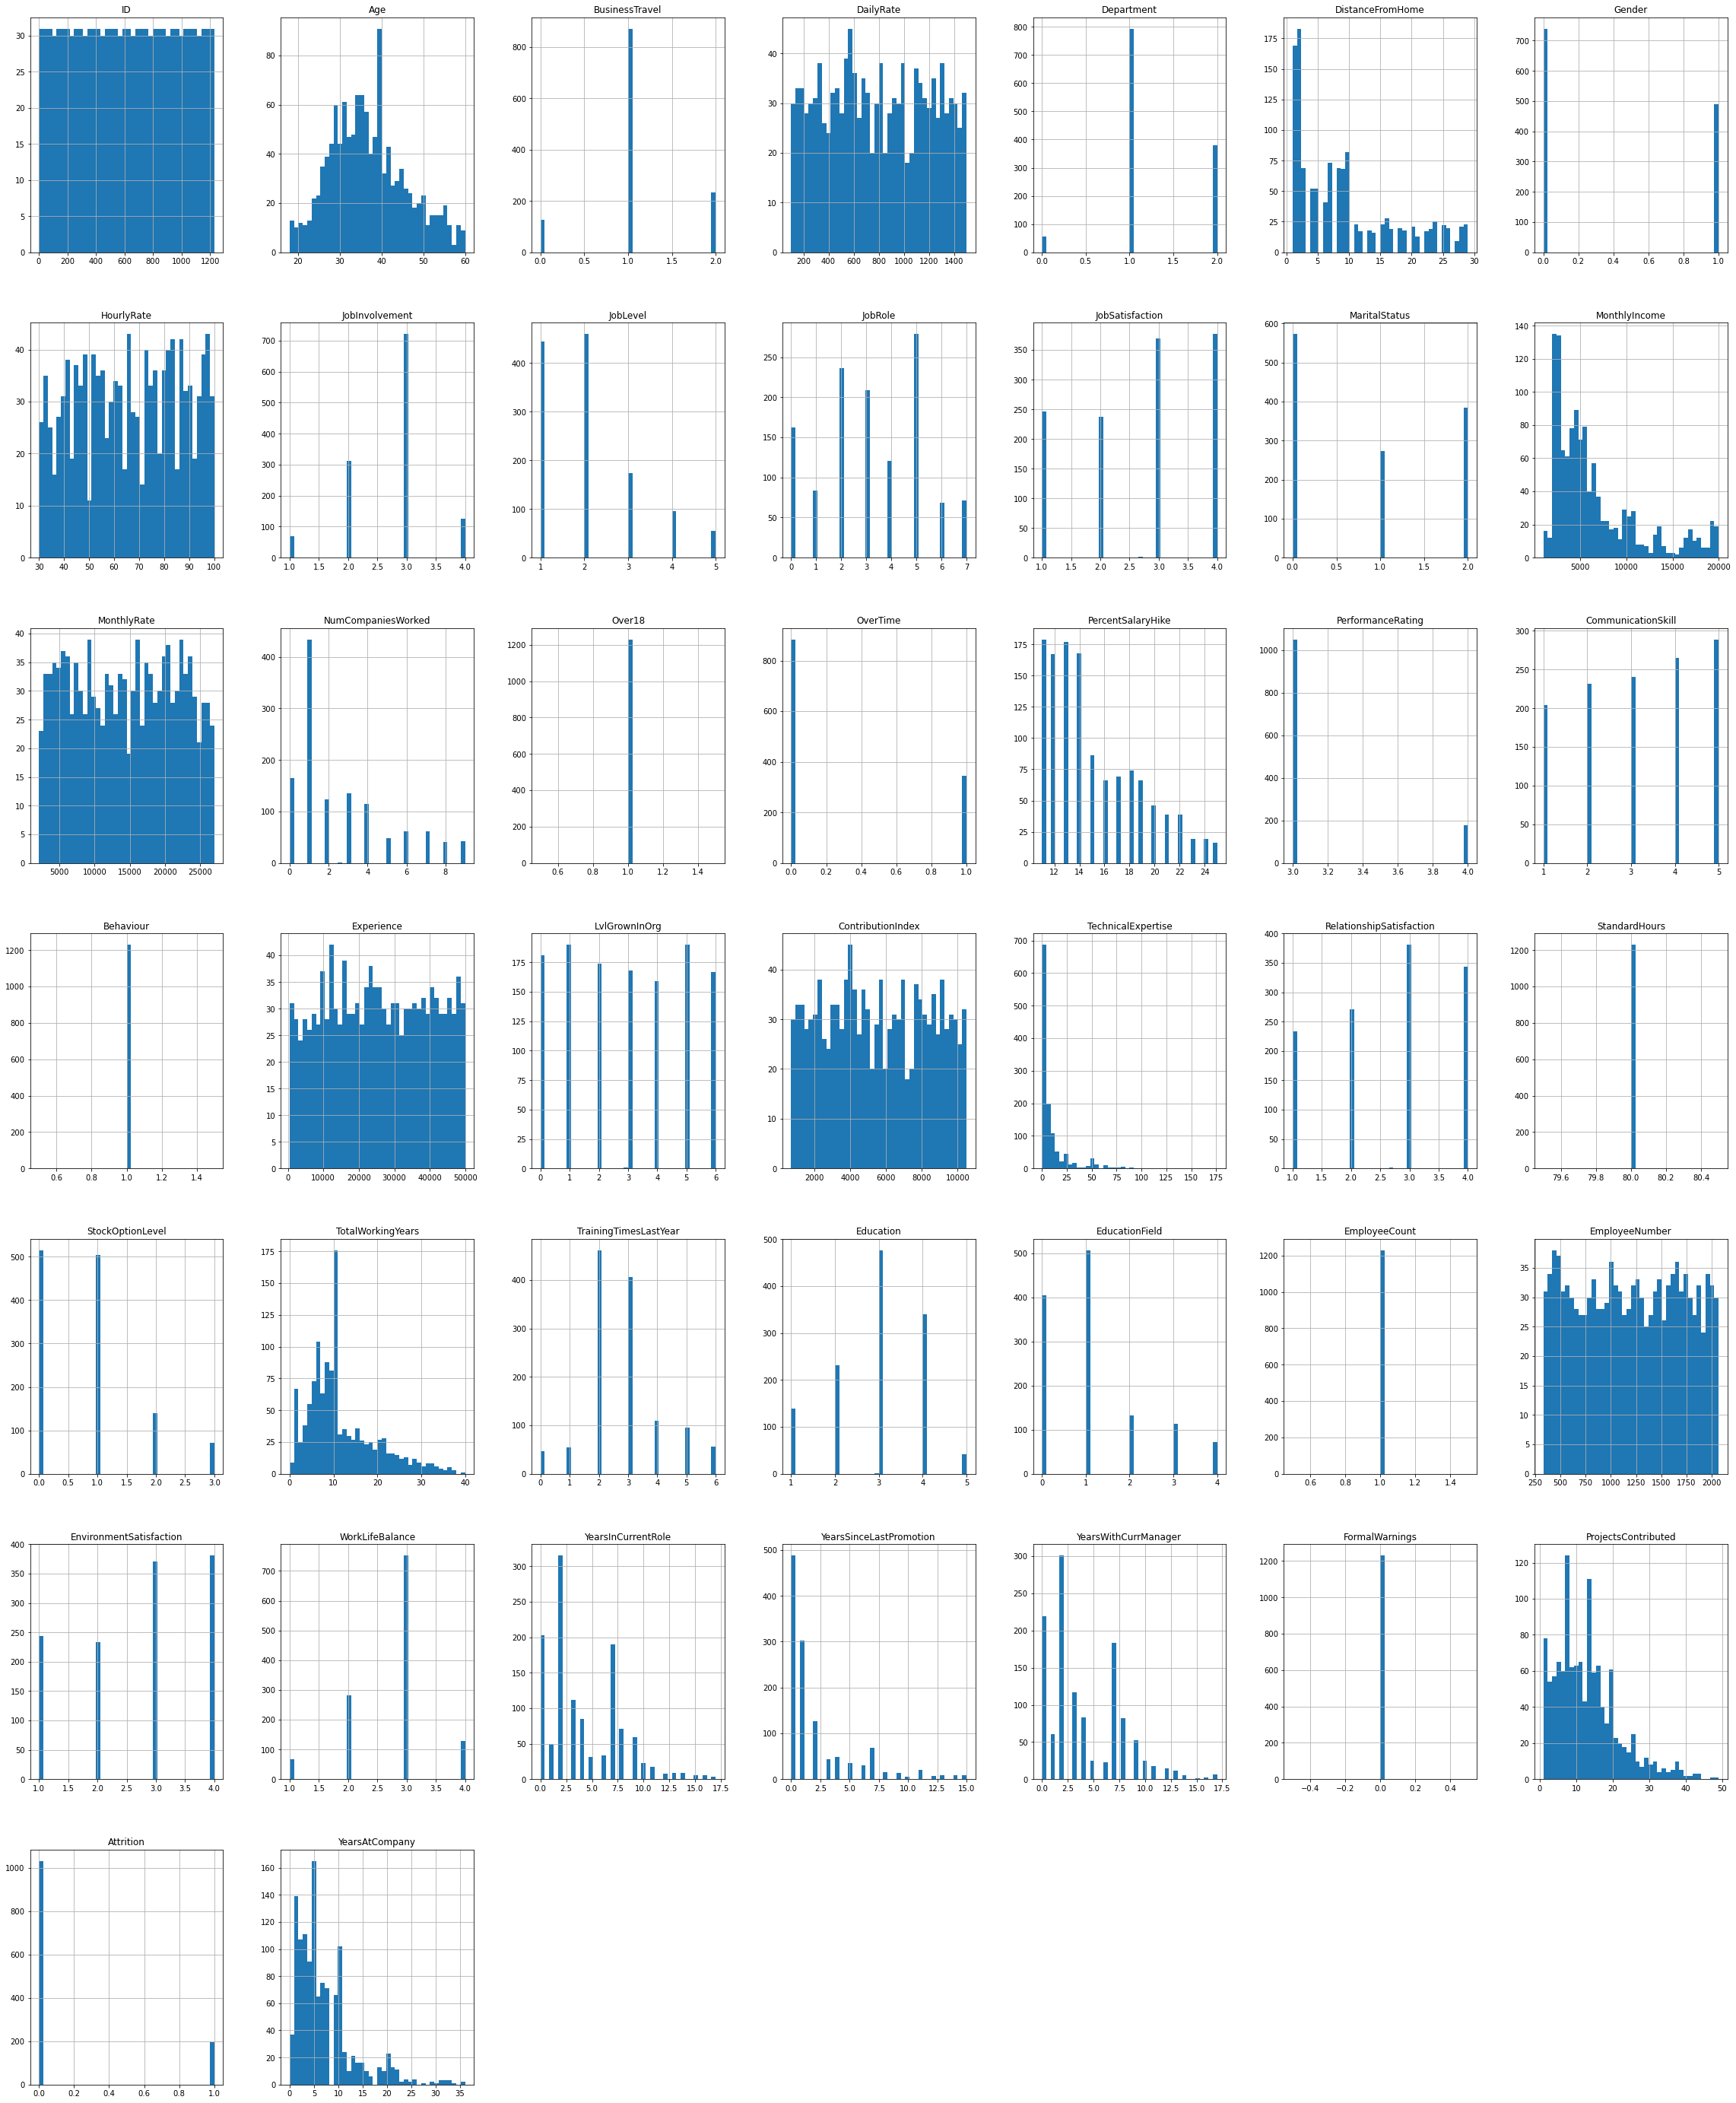

In [25]:
#Building Plots based on the Features
import matplotlib.pyplot as plt
training_data.hist(bins=40, figsize=(40,50))
plt.show()

In [26]:
#Dropping irrelavant features
training_data = training_data.drop(["Over18", "Behaviour", "StandardHours", "EmployeeCount", "FormalWarnings"], axis=1)
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,0,1098,2.0,3.0,6,3.0,6,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,1,369,2.0,3.0,3,1.0,5,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,2,568,1.0,2.0,0,0.0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,0,1993,1.0,3.0,14,12.0,11,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1,1878,4.0,3.0,0,0.0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,3,1299,2.0,3.0,7,7.0,7,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,1,2034,1.0,3.0,7,0.0,10,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,2,1733,2.0,3.0,2,2.0,2,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,0,705,1.0,4.0,2,0.0,2,15.0,0,3


In [27]:
#Cells for debugging

In [28]:
#Splitting Test and Train Dataset
test_data = training_data[924:]
training_data = training_data[0:924]

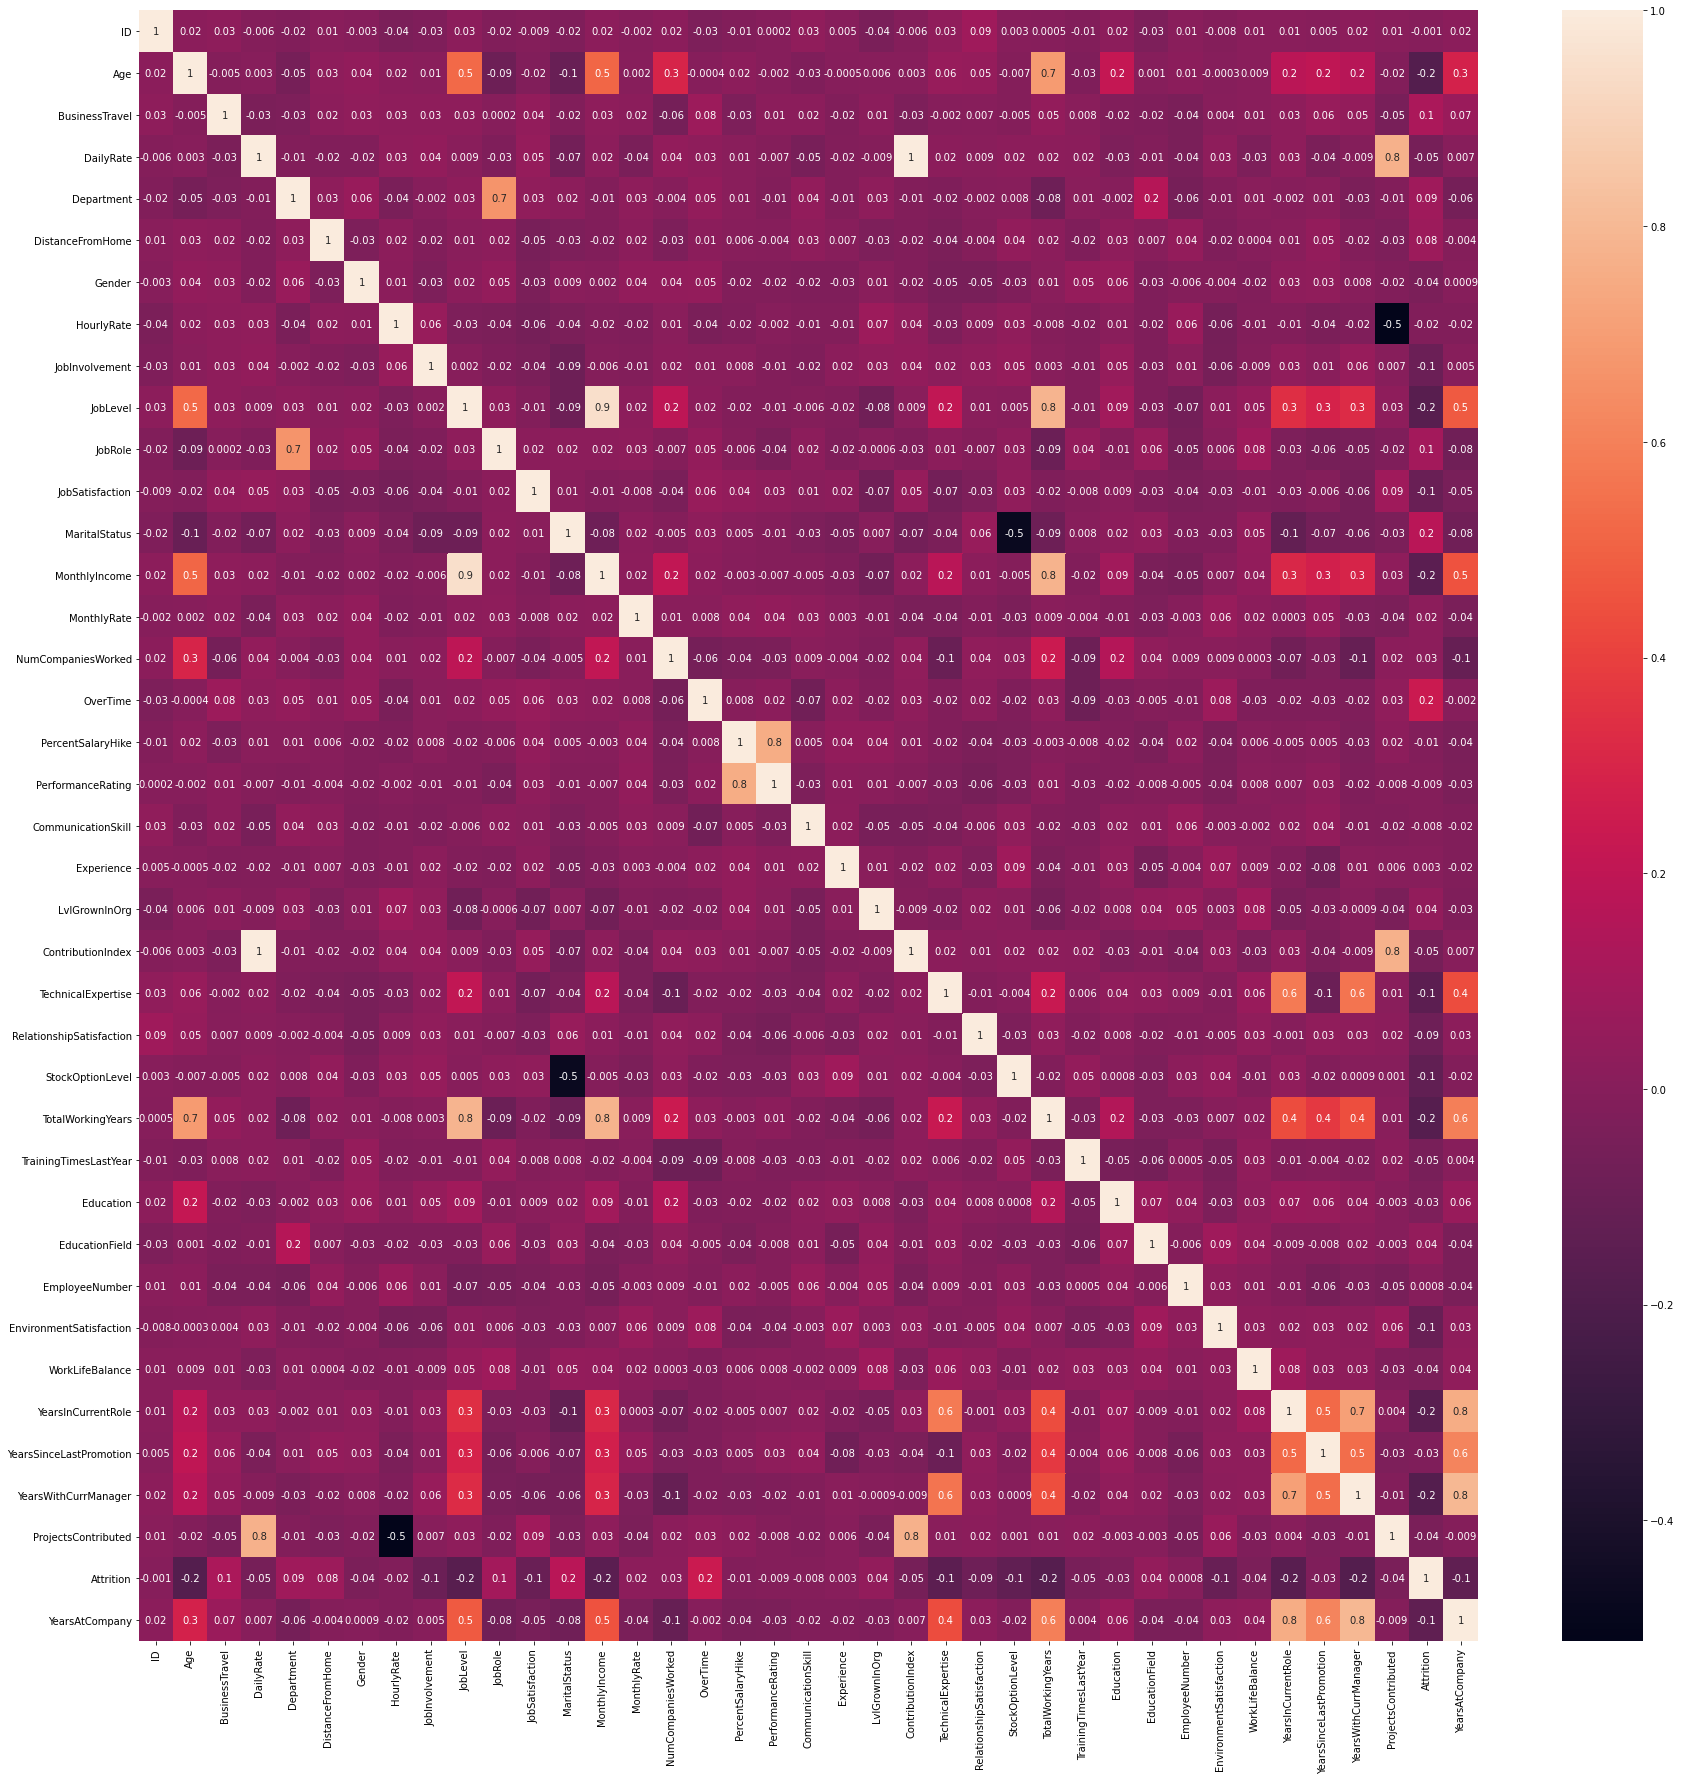

In [29]:
#Building Correlation matrix and Heatmaps based on the Features 
corr=training_data.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(training_data.corr(), annot = True, fmt='.1g', ax=ax)

In [30]:
#Correlation Matrix 
corr

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
ID,1.000000,0.016891,0.027610,-0.006128,-0.020438,0.012672,-0.003015,-0.037114,-0.027482,0.025430,...,-0.030774,0.010288,-0.007782,0.013153,0.011968,0.005164,0.020530,0.009813,-0.001079,0.018137
Age,0.016891,1.000000,-0.004885,0.002814,-0.053856,0.028947,0.040476,0.018130,0.012128,0.523822,...,0.001394,0.014594,-0.000345,0.008969,0.183442,0.198072,0.172287,-0.015697,-0.179900,0.280806
BusinessTravel,0.027610,-0.004885,1.000000,-0.033687,-0.028468,0.023616,0.034189,0.025718,0.027684,0.029573,...,-0.022297,-0.041252,0.003590,0.011875,0.030683,0.059107,0.045160,-0.049739,0.130403,0.070704
DailyRate,-0.006128,0.002814,-0.033687,1.000000,-0.012198,-0.018492,-0.018154,0.034890,0.038842,0.008820,...,-0.011548,-0.042781,0.028676,-0.033159,0.025861,-0.037978,-0.009040,0.770883,-0.052705,0.007058
Department,-0.020438,-0.053856,-0.028468,-0.012198,1.000000,0.030991,0.064746,-0.040422,-0.002439,0.030476,...,0.163393,-0.056070,-0.010982,0.011560,-0.002418,0.010028,-0.034190,-0.010557,0.088478,-0.058911
DistanceFromHome,0.012672,0.028947,0.023616,-0.018492,0.030991,1.000000,-0.031468,0.021852,-0.018293,0.009535,...,0.007435,0.044334,-0.024316,0.000398,0.010358,0.048602,-0.015486,-0.032172,0.076291,-0.004172
Gender,-0.003015,0.040476,0.034189,-0.018154,0.064746,-0.031468,1.000000,0.013941,-0.031884,0.015754,...,-0.027509,-0.005746,-0.004255,-0.016453,0.028460,0.034986,0.007634,-0.016506,-0.035639,0.000914
HourlyRate,-0.037114,0.018130,0.025718,0.034890,-0.040422,0.021852,0.013941,1.000000,0.060140,-0.032665,...,-0.024117,0.063263,-0.059357,-0.013759,-0.013232,-0.036388,-0.023835,-0.512030,-0.017966,-0.018373
JobInvolvement,-0.027482,0.012128,0.027684,0.038842,-0.002439,-0.018293,-0.031884,0.060140,1.000000,0.002150,...,-0.027692,0.013140,-0.055539,-0.009367,0.034069,0.011606,0.057154,0.006862,-0.096415,0.004557
JobLevel,0.025430,0.523822,0.029573,0.008820,0.030476,0.009535,0.015754,-0.032665,0.002150,1.000000,...,-0.025056,-0.067904,0.014354,0.053969,0.335275,0.286136,0.326649,0.027205,-0.165603,0.477292


In [31]:
test_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
924,925,45.0,1,176.0,0,4,1,56.0,1.0,3,...,1,1744,3.0,4.0,0,0.0,3,3.0,0,5
925,926,37.0,1,674.0,1,13,0,47.0,3.0,2,...,0,1543,1.0,3.0,8,3.0,7,14.0,0,10
926,927,41.0,1,334.0,2,2,0,88.0,3.0,4,...,1,410,4.0,3.0,10,0.0,4,3.0,0,22
927,928,50.0,1,939.0,1,24,0,95.0,3.0,4,...,1,1005,4.0,3.0,11,1.0,5,9.0,0,12
928,929,47.0,2,1309.0,2,4,0,99.0,3.0,2,...,0,467,2.0,3.0,0,0.0,0,13.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,3,1299,2.0,3.0,7,7.0,7,20.0,1,7
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,1,2034,1.0,3.0,7,0.0,10,9.0,0,20
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,2,1733,2.0,3.0,2,2.0,2,15.0,1,2
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,0,705,1.0,4.0,2,0.0,2,15.0,0,3


In [32]:
training_data

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed,Attrition,YearsAtCompany
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,0,1098,2.0,3.0,6,3.0,6,15.0,1,20
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,1,369,2.0,3.0,3,1.0,5,7.0,0,6
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,2,568,1.0,2.0,0,0.0,0,3.0,0,1
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,0,1993,1.0,3.0,14,12.0,11,14.0,0,17
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,1,1878,4.0,3.0,0,0.0,0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,920,45.0,1,1449.0,2,2,1,94.0,1.0,5,...,2,1277,1.0,3.0,10,1.0,11,15.0,1,24
920,921,34.0,1,1239.0,2,13,0,39.0,3.0,3,...,0,1951,4.0,2.0,7,1.0,1,31.0,0,8
921,922,43.0,1,177.0,1,8,1,55.0,3.0,2,...,1,920,1.0,4.0,0,0.0,0,3.0,0,1
922,923,31.0,2,307.0,1,29,0,71.0,2.0,1,...,0,355,3.0,4.0,4,1.0,4,4.0,1,5


In [33]:
#Removing the labels from the dataset
X = training_data.copy()
Regress_X = training_data.copy()
X = X.drop(["Attrition","YearsAtCompany"], axis=1)
Regress_X = X
X

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,TrainingTimesLastYear,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
0,1,44.0,1,1376.0,0,1,0,91.0,2.0,3,...,1,2.0,0,1098,2.0,3.0,6,3.0,6,15.0
1,2,25.0,0,675.0,1,5,0,85.0,4.0,2,...,2,2.0,1,369,2.0,3.0,3,1.0,5,7.0
2,3,57.0,1,210.0,2,29,0,56.0,2.0,4,...,3,3.0,2,568,1.0,2.0,0,0.0,0,3.0
3,4,47.0,1,1180.0,1,25,0,84.0,3.0,3,...,3,3.0,0,1993,1.0,3.0,14,12.0,11,14.0
4,5,22.0,1,391.0,1,7,0,75.0,3.0,1,...,2,1.0,1,1878,4.0,3.0,0,0.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,920,45.0,1,1449.0,2,2,1,94.0,1.0,5,...,2,3.0,2,1277,1.0,3.0,10,1.0,11,15.0
920,921,34.0,1,1239.0,2,13,0,39.0,3.0,3,...,2,4.0,0,1951,4.0,2.0,7,1.0,1,31.0
921,922,43.0,1,177.0,1,8,1,55.0,3.0,2,...,2,3.0,1,920,1.0,4.0,0,0.0,0,3.0
922,923,31.0,2,307.0,1,29,0,71.0,2.0,1,...,2,2.0,0,355,3.0,4.0,4,1.0,4,4.0


In [34]:
#Putting the labels in the variable Y
Y = training_data["Attrition"]
Regress_Y = training_data["YearsAtCompany"] 
Y

0      1
1      0
2      0
3      0
4      1
      ..
919    1
920    0
921    0
922    1
923    0
Name: Attrition, Length: 924, dtype: int64

In [35]:
#Applying Logistic Regression to the dataset
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,Y)

c:\users\prane\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
#Building the test dataset by removing the labels from the dataset
test_X = test_data.copy()
Regress_test_X = test_data.copy()
test_X = test_X.drop(["Attrition","YearsAtCompany"], axis=1)
Regress_test_X = test_X
test_X

,ID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobLevel,...,TrainingTimesLastYear,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ProjectsContributed
924,925,45.0,1,176.0,0,4,1,56.0,1.0,3,...,2,3.0,1,1744,3.0,4.0,0,0.0,3,3.0
925,926,37.0,1,674.0,1,13,0,47.0,3.0,2,...,2,3.0,0,1543,1.0,3.0,8,3.0,7,14.0
926,927,41.0,1,334.0,2,2,0,88.0,3.0,4,...,2,4.0,1,410,4.0,3.0,10,0.0,4,3.0
927,928,50.0,1,939.0,1,24,0,95.0,3.0,4,...,2,3.0,1,1005,4.0,3.0,11,1.0,5,9.0
928,929,47.0,2,1309.0,2,4,0,99.0,3.0,2,...,3,1.0,0,467,2.0,3.0,0,0.0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1226,29.0,1,806.0,1,7,1,39.0,3.0,1,...,2,3.0,3,1299,2.0,3.0,7,7.0,7,20.0
1226,1227,41.0,1,582.0,1,28,1,60.0,2.0,4,...,3,4.0,1,2034,1.0,3.0,7,0.0,10,9.0
1227,1228,36.0,1,1456.0,2,13,0,96.0,2.0,2,...,3,5.0,2,1733,2.0,3.0,2,2.0,2,15.0
1228,1229,23.0,1,885.0,1,4,0,58.0,4.0,1,...,3,3.0,0,705,1.0,4.0,2,0.0,2,15.0


In [37]:
#Putting the labels in test_Y
test_Y = test_data["Attrition"]
Regress_test_Y = test_data["YearsAtCompany"]

In [38]:
test_Y

924     0
925     0
926     0
927     0
928     0
       ..
1225    1
1226    0
1227    1
1228    0
1229    1
Name: Attrition, Length: 306, dtype: int64

In [39]:
#Predicting the output
clf.predict(test_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
#Finding the accuracy of the model
print("Accuracy : {}".format(clf.score(test_X,test_Y)))

Accuracy : 0.803921568627451


In [41]:
#Applying Gaussian Naive Bayes to our dataset
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,Y)
#Predicting the output
y_pred=nb.predict_proba(test_X)[:,1]


In [42]:
y_pred

array([6.28607160e-02, 3.27513426e-02, 5.77568549e-08, 8.11335900e-06,
       8.16434620e-01, 2.46792356e-08, 5.63869849e-01, 2.64143567e-01,
       1.10224866e-01, 7.98324952e-01, 7.42567036e-01, 5.16390820e-02,
       2.19527361e-01, 4.60920325e-02, 7.89759495e-01, 7.80159053e-06,
       1.22228680e-07, 3.78811523e-07, 5.76420400e-01, 1.56947831e-02,
       9.62040518e-01, 6.93387774e-01, 2.05596730e-02, 5.52545537e-01,
       3.03962183e-14, 5.48375063e-05, 2.41949131e-02, 8.34216138e-05,
       1.04730928e-01, 1.23665325e-05, 6.70290266e-07, 9.37681495e-01,
       6.70242282e-01, 2.66629284e-02, 3.74155275e-01, 4.67202720e-01,
       2.47518605e-02, 7.39892090e-01, 1.65096513e-04, 2.44478973e-01,
       5.99130171e-01, 2.25189230e-07, 8.05324306e-01, 2.28949701e-02,
       4.98029651e-02, 7.07568408e-01, 2.05333954e-08, 7.33622214e-01,
       5.46768836e-01, 1.81854411e-10, 2.84268552e-01, 7.86166897e-01,
       9.64081255e-01, 4.05550981e-01, 8.32555653e-01, 4.76530081e-01,
      

In [43]:
#Cells for debugging

In [44]:
#Counting the number of zeroes in test dataset
np.count_nonzero(test_Y==0)

246

In [45]:
#Finding the accuracy of the model
print("Accuracy : {}".format(nb.score(test_X,test_Y)))

Accuracy : 0.7320261437908496


In [46]:
#Applying the Linear Regression algorithm to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Regress_X,Regress_Y)

LinearRegression()

In [47]:
#Predicting the result
prediction_linear = regressor.predict(test_X)

In [48]:
prediction_linear

array([ 3.27128823, 11.65360779, 12.29488499, 13.03980268,  0.05255174,
       18.06122182,  4.8684252 ,  2.76296418,  3.17542303,  2.6908098 ,
        5.35416616, 12.04248983,  5.78570006,  7.22073257,  3.35977696,
       22.96731317,  9.74343154, 16.37520293,  3.2890853 ,  9.64528165,
        3.56618806,  0.62674255, 14.67580505, -1.01037614, 14.48541177,
        8.73140556, 12.47869684, 15.72850497, 13.37733943,  8.5207538 ,
       20.17107295,  2.89470329,  1.47969615, 10.49254724,  3.78334891,
        5.7369209 , 10.45372102,  4.37868909,  7.31938695,  8.41238089,
        6.54281759, 20.67997691,  3.75313987,  6.92473059, 12.40710011,
        0.15511664,  8.30406942, -0.96775381, 10.25781735, 12.32937327,
        5.41799133,  3.43537437,  2.4461519 ,  1.19690438,  1.21914906,
        3.19294834, 14.58493513, 10.17960796,  2.48208058, 12.76898694,
        5.013249  , 11.96094055, 21.80330831,  1.45459483,  3.45138125,
        2.88765448,  7.55529784,  3.77186517, -0.15821218,  3.79

In [49]:
#Finding the accuracy
print("Accuracy : {}".format(regressor.score(Regress_test_X,Regress_test_Y)))

Accuracy : 0.7251041869489561
